In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 


# Linear Regression

Linear Regression answers the question: how do we find a line that fits the data? 

Let's first generate a realistic dataset, you can think of this as 

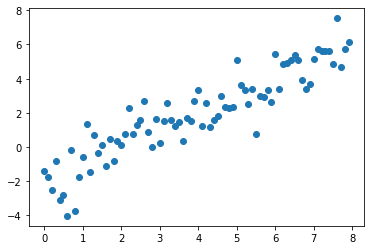

In [109]:
x = torch.arange(0, 8, 0.1)  # [0, 0.1, 0.2, ..., 9.9]

y = 1*x - 2  # y = (mx + q)

y += torch.randn(x.shape[0]) # add noise  

plt.scatter(x, y)

Given this chart, we will try to fit the line y = mx + q by finding the PARAMETERS m and q to best fit the data <br> 

Now two questions arise <br>
- How do we assess how well the line is fit to the data?
- How do we find the best parameters? 

It would be helpful to have some single value that accurately describes how well the model is doing <br> 
Let's explore solutions for evaluating the function --> MSE <br>
Now that we have a function going from dataset and parameters to loss, we can use a calculus tool to optimize it, the derivative

In [117]:
m = 0
q = 0
lr = 0.01

In [118]:
for i in range(1000):
    predictions = m * x + q
    loss = ((predictions - y)**2).mean()
    
    dm = (2 * (predictions - y) * x).mean()
    dq = (2 * (predictions - y)).mean() 
    # double checked, the gradient is correct

    m -= lr * dm
    q -= lr * dq

    if i % 200 == 0:
        print("Loss: ", loss.item(), "\n - m: ", m.item(), "\n - q: ", q.item(), "\n")


Loss:  10.139840126037598 
 - m:  0.26069843769073486 
 - q:  0.039293017238378525 

Loss:  1.2127615213394165 
 - m:  0.8433698415756226 
 - q:  -1.1789528131484985 

Loss:  1.083640217781067 
 - m:  0.934746265411377 
 - q:  -1.6575602293014526 

Loss:  1.0656646490097046 
 - m:  0.9688401222229004 
 - q:  -1.836135745048523 

Loss:  1.063162088394165 
 - m:  0.9815611839294434 
 - q:  -1.9027655124664307 



## Logistic Regression
Logistic regression answers the following question: <br> How do we find a function that classifies a binary dataset?

C:\Users\lucam\AppData\Local\Temp/ipykernel_6912/3909566606.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(x + torch.randn(100) > 3.5).float()


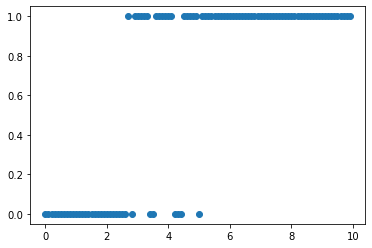

In [15]:
x = torch.arange(0, 10, 0.1)
y = torch.tensor(x + torch.randn(100) > 3.5).float()
plt.scatter(x, y)

Actually, because some datapoints are scattered on top and bottom, we have to accept some level of uncertainty in the results, just as we did with Linear Regression. <br> 


So the results won't be binary but a probability of the output being one. <br>
We need a function that can scale any value to [0, 1]. We can start with sigmoid.


Interestingly, we choose activation functions such that their derivative is trivial to calculate, the derivative of sigmoid is (1-simoid(x))

In [121]:
# we add sigmoid, an activation function that squashes the output between 0 and 1
def sigmoid(x): return 1 / (1 + torch.exp(-x))

m = torch.zeros(1, requires_grad=True)
q = torch.zeros(1, requires_grad=True)
lr = 1e-1

In [122]:
iterations = 1000

for i in range(iterations):
    predictions = sigmoid(m * x + q) / 2 + 0.5
    loss = ((predictions - y)**2).mean()
    loss.backward()
    
    with torch.no_grad():
        m -= lr * m.grad
        q -= lr * q.grad
        m.grad = None
        q.grad = None

    if i % 200 == 0:
        print("Loss: ", loss.item(), "\n - m: ", m.item(), "\n - q: ", q.item(), "\n")


Loss:  7.755364418029785 
 - m:  0.25181055068969727 
 - q:  0.03036627545952797 

Loss:  6.888771057128906 
 - m:  1.1195812225341797 
 - q:  -1.636855959892273 

Loss:  6.825065612792969 
 - m:  1.4482064247131348 
 - q:  -2.700385808944702 

Loss:  6.799855709075928 
 - m:  1.691107988357544 
 - q:  -3.3620269298553467 

Loss:  6.786736488342285 
 - m:  1.8803646564483643 
 - q:  -3.835725784301758 



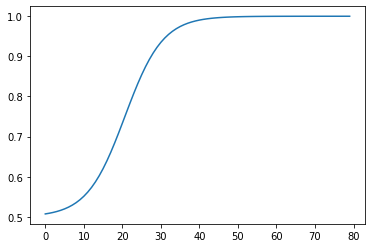

In [123]:
plt.plot(predictions.detach().numpy())

As you can see we got a curve that approximates the original chart pretty well. <br>
In the future we will use different loss functions, such as tanh, relu and gelu

Sigmoid: squashes the output between 0 and 1


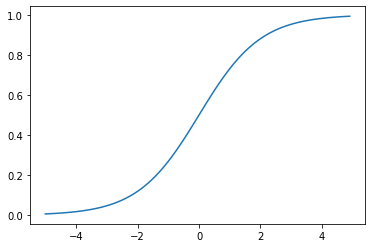

Tanh: squashes the output between -1 and 1


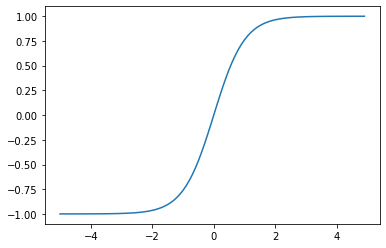

Relu: keeps the positive values and sets the negative values to 0


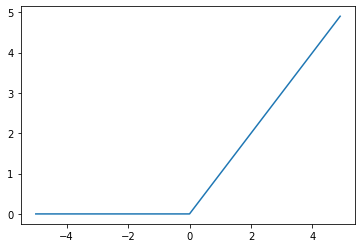

Gelu: keeps the positive values and applies a smooth function over the negative values


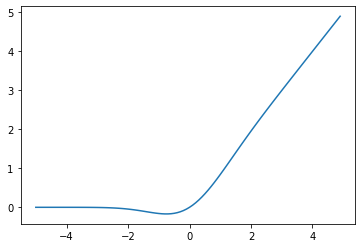

In [136]:
from torch.nn.functional import sigmoid, relu, tanh, gelu

x = torch.arange(-5, 5, 0.1)

print("Sigmoid: squashes the output between 0 and 1")
plt.plot(x, sigmoid(x))
plt.show()

print("Tanh: squashes the output between -1 and 1")
plt.plot(x, tanh(x))
plt.show()

print("Relu: keeps the positive values and sets the negative values to 0")
plt.plot(x, relu(x))
plt.show()

print("Gelu: keeps the positive values and applies a smooth function over the negative values") 
plt.plot(x, gelu(x))
plt.show()
